Injection data loaded.


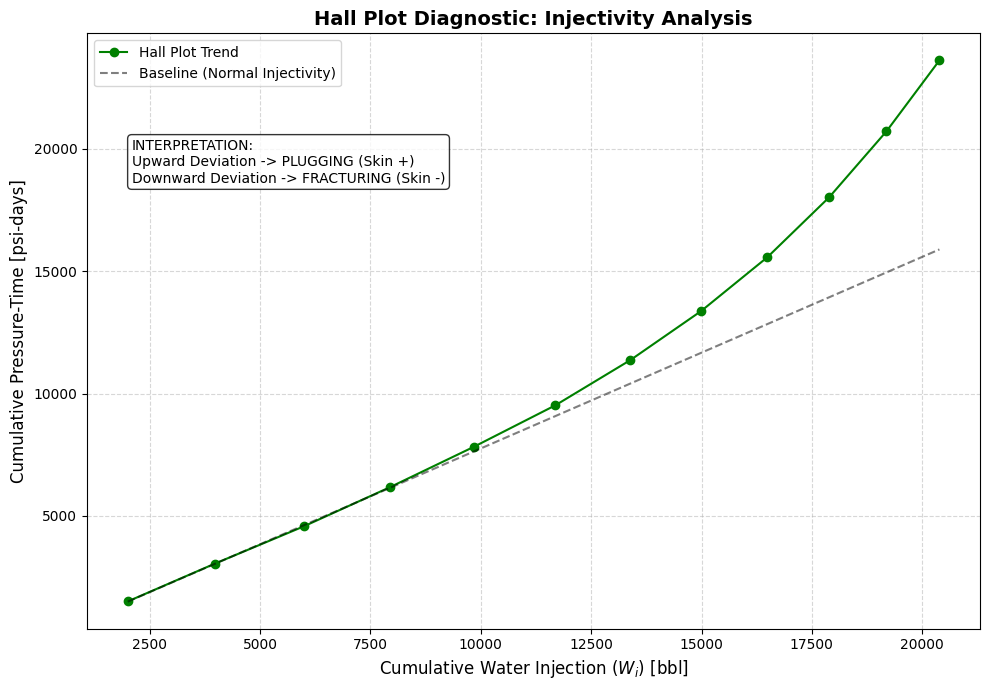

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# --- Configuration for Injection Data ---
INJECTION_CSV = 'injection_data.csv'

def plot_hall_diagnostic(df_inj):
    """
    Generates the Hall Plot for Injection Surveillance.
    X-Axis: Cumulative Water Injection (Wi)
    Y-Axis: Cumulative Pressure-Time Integral (Sum(P * dt))
    """
    
    # 1. Calculate Cumulative Injection (Wi)
    # Assuming daily records, Cumulative = Sum(Daily Rate)
    df_inj['Cumulative_Injection'] = df_inj['Daily_Injection_Rate_bbl'].cumsum()
    
    # 2. Calculate Pressure-Time Integral
    # For daily data, dt = 1 day. 
    # Hall Integral = Cumulative Sum of (Pressure * 1 day)
    # Note: If dates are irregular, calculate dt = date.diff().dt.days
    df_inj['Pressure_Time'] = df_inj['Injection_Pressure_psi'].cumsum()
    
    # 3. Visualization
    fig, ax = plt.subplots(figsize=(10, 7))
    
    ax.plot(df_inj['Cumulative_Injection'], df_inj['Pressure_Time'], 
            marker='o', linestyle='-', color='green', label='Hall Plot Trend')
    
    # Add a reference straight line based on early time (first 4 points)
    # to visually highlight the deviation
    if len(df_inj) > 4:
        x_ref = df_inj['Cumulative_Injection'].iloc[:4].values
        y_ref = df_inj['Pressure_Time'].iloc[:4].values
        
        # Fit linear trend
        slope, intercept = np.polyfit(x_ref, y_ref, 1)
        
        # Project this "Normal" trend across the whole x-axis
        x_proj = df_inj['Cumulative_Injection'].values
        y_proj = slope * x_proj + intercept
        
        ax.plot(x_proj, y_proj, linestyle='--', color='black', alpha=0.5, label='Baseline (Normal Injectivity)')

    ax.set_title("Hall Plot Diagnostic: Injectivity Analysis", fontsize=14, fontweight='bold')
    ax.set_xlabel("Cumulative Water Injection ($W_i$) [bbl]", fontsize=12)
    ax.set_ylabel("Cumulative Pressure-Time [psi-days]", fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Annotation for user guidance
    text_str = (
        "INTERPRETATION:\n"
        "Upward Deviation -> PLUGGING (Skin +)\n"
        "Downward Deviation -> FRACTURING (Skin -)"
    )
    plt.text(0.05, 0.75, text_str, transform=ax.transAxes, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))
    
    plt.tight_layout()
    plt.show()

# --- Execution for Injection Data ---
try:
    df_inj = pd.read_csv(INJECTION_CSV)
    print("Injection data loaded.")
    plot_hall_diagnostic(df_inj)
except FileNotFoundError:
    print(f"Warning: {INJECTION_CSV} not found. Skipping Hall Plot.")